## Time-series based analysis of Earthquake Risk Factors

### Part 3: Performing EDA on the pickled reddit dataset

In this notebook, I explore several aspects of the dataframe and also prepare the dataframe objects for further modeling.

Importing the required libraries:

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

import seaborn as sns

## for geospatial
import folium
import geopy
## for deep learning
import minisom

## for machine learning
import tensorflow as tf
import os
import datetime
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

### Part 2.1: Importing the saved clean data from earthquake

In [102]:
file_path = "../datasets/" + "combined_eq_california" + "_timeseries" + ".csv"

df_eq = pd.read_csv(file_path)

df_eq = df_eq[["time", "mag", "sig", "longitude", "latitude", "depth"]]

df_eq["time"] = pd.to_datetime(df_eq["time"])
df_eq["timestamps"] = df_eq["time"]
df_eq.set_index('time', inplace=True)


df_eq.head(5)

,mag,sig,longitude,latitude,depth,timestamps
time,,,,,,
1970-01-02 10:45:20.570,3.14,152,-119.695667,34.206000,6.000000,1970-01-02 10:45:20.570
1970-01-02 21:47:53.740,2.61,105,-117.733667,35.735167,1.650000,1970-01-02 21:47:53.740
1970-01-03 02:51:58.400,4.00,246,-122.088000,37.298000,6.274206,1970-01-03 02:51:58.400
1970-01-03 19:48:40.840,3.16,154,-116.830500,33.960500,6.000000,1970-01-03 19:48:40.840
1970-01-04 02:27:15.700,2.74,116,-116.843333,34.333500,6.000000,1970-01-04 02:27:15.700


In [103]:
df_eq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313342 entries, 1970-01-02 10:45:20.570000 to 2020-10-01 15:28:09.630000
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   mag         313342 non-null  float64       
 1   sig         313342 non-null  int64         
 2   longitude   313342 non-null  float64       
 3   latitude    313342 non-null  float64       
 4   depth       313342 non-null  float64       
 5   timestamps  313342 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 16.7 MB


In [104]:
df_eq.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mag,313342.0,2.503171,0.510198,2.000,2.140000,2.35000,2.7000,7.300
sig,313342.0,101.852379,56.402848,62.000,70.000000,85.00000,112.0000,2910.000
longitude,313342.0,-118.583263,3.334398,-131.771,-121.236417,-118.09600,-116.3200,-107.001
latitude,313342.0,37.001109,4.004880,24.007,34.052000,36.19625,38.8195,50.000
depth,313342.0,6.274206,6.207409,-3.500,2.232000,5.38500,8.7770,257.000


### Checking the time_stamps:

Text(0, 0.5, 'Timestamp')

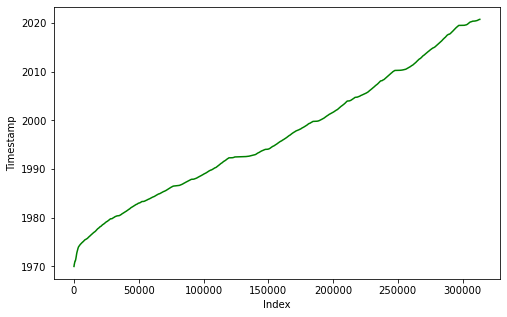

In [105]:
plt.figure(figsize = (8, 5))

plt.plot(df_eq.index, "g")
plt.xlabel('Index')
plt.ylabel('Timestamp')

In [106]:
df_eq.shape

(313342, 6)

## Important: need to drop repetitive rows, 10 rows.

In [107]:
df_eq[df_eq.duplicated('timestamps')]

,mag,sig,longitude,latitude,depth,timestamps
time,,,,,,
1983-07-26 19:03:28.580,2.44,92,-117.680000,35.030000,-0.861,1983-07-26 19:03:28.580
1999-10-26 22:16:20.490,3.15,153,-120.000000,37.000000,5.881,1999-10-26 22:16:20.490
2003-11-06 22:04:13.230,3.68,668,-121.668167,37.204666,-0.334,2003-11-06 22:04:13.230
2008-01-16 00:39:53.930,2.19,74,-111.222833,39.419833,-1.760,2008-01-16 00:39:53.930
2012-08-26 21:17:26.720,3.94,239,-115.607667,32.980167,8.924,2012-08-26 21:17:26.720
2013-09-13 12:56:00.720,3.70,211,-110.789300,44.752300,4.110,2013-09-13 12:56:00.720
2015-08-04 02:01:57.000,2.90,130,-113.768000,47.684000,11.500,2015-08-04 02:01:57.000
2016-02-06 00:33:04.420,2.80,121,-112.743200,37.146800,17.960,2016-02-06 00:33:04.420
2019-10-28 08:10:43.470,3.12,150,-122.778833,38.807000,0.970,2019-10-28 08:10:43.470


In [108]:
# Dropping rows
df_eq = df_eq.drop_duplicates(subset=['timestamps'])

df_eq["timestamps"].diff().describe()

count                       313331
mean     0 days 01:25:11.019876935
std      0 days 02:33:43.027017800
min         0 days 00:00:00.009000
25%         0 days 00:08:25.260000
50%         0 days 00:36:55.740000
75%         0 days 01:45:43.790000
max         8 days 04:01:06.380000
Name: timestamps, dtype: object

In [109]:
df_eq.head()

,mag,sig,longitude,latitude,depth,timestamps
time,,,,,,
1970-01-02 10:45:20.570,3.14,152,-119.695667,34.206000,6.000000,1970-01-02 10:45:20.570
1970-01-02 21:47:53.740,2.61,105,-117.733667,35.735167,1.650000,1970-01-02 21:47:53.740
1970-01-03 02:51:58.400,4.00,246,-122.088000,37.298000,6.274206,1970-01-03 02:51:58.400
1970-01-03 19:48:40.840,3.16,154,-116.830500,33.960500,6.000000,1970-01-03 19:48:40.840
1970-01-04 02:27:15.700,2.74,116,-116.843333,34.333500,6.000000,1970-01-04 02:27:15.700


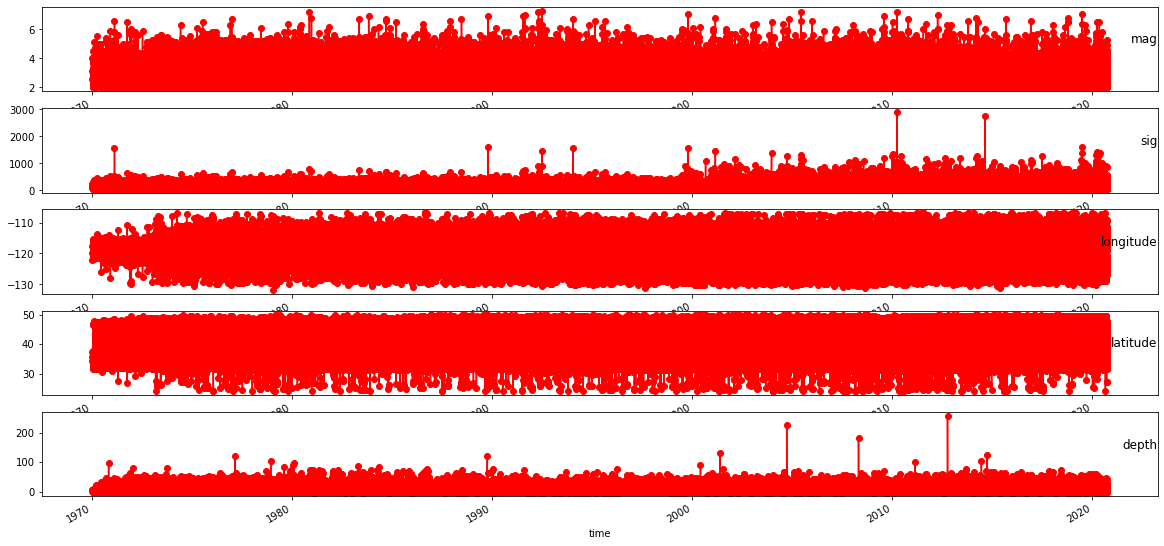

In [110]:
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i = 1
# plot each column
plt.figure(figsize = (20, 10))
for group in groups:
	plt.subplot(len(groups), 1, i)
	df_eq.iloc[:,group].plot(style="ro-")
	plt.title(df_eq.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

### Is there any collinearity between parameters:

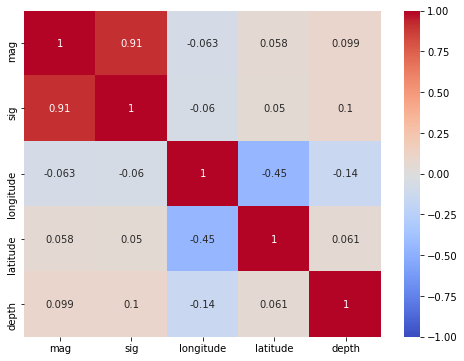

In [111]:
df_corr = df_eq.corr()

#plt.figure(figsize=(6,6))
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,
        vmin=-1,
        cmap='coolwarm',
        annot=True);
# plt.savefig("../plots/Loma_prieta_EDA_corr_plots.png")

### Figure discussion: 
---
Mag and sig are almost correlated, meaning that sig which was based on judgement and phsycial mag are corrleated. On the other hand, mag and sig coud happen on all depoths and longitude/latitudes.<br>
Longitude and latitude are negatively correlated meaning that the lineation going from NW-SE happening.

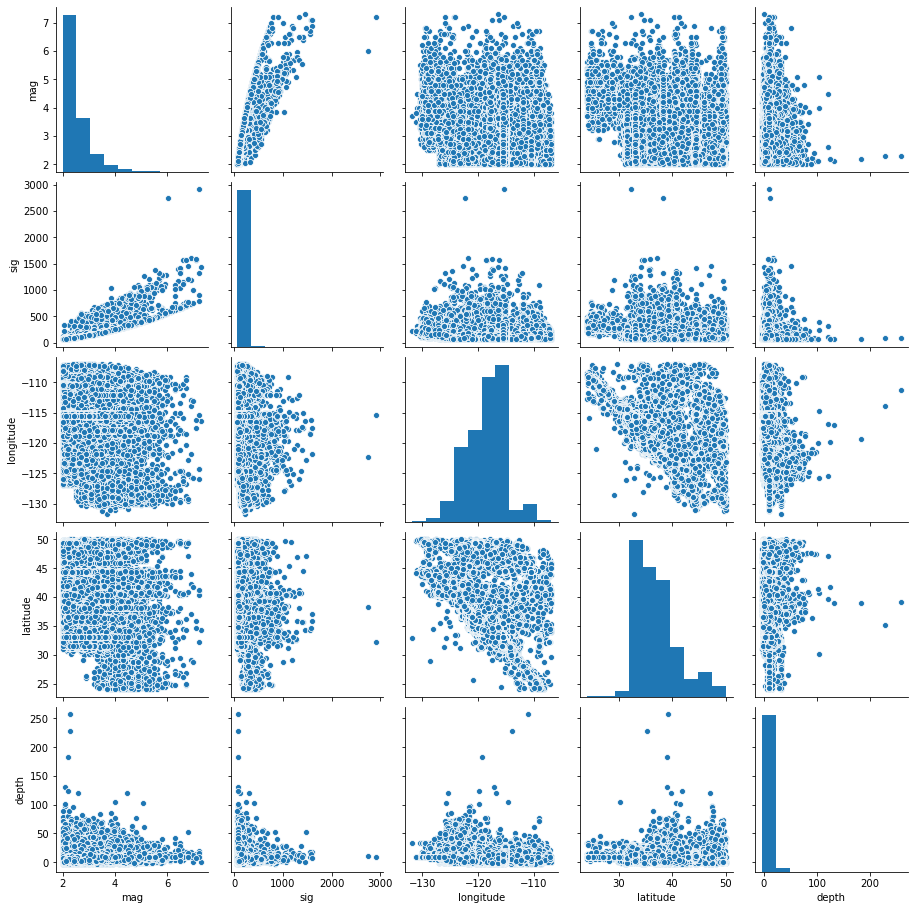

In [112]:
sns.pairplot(df_eq, hue=None);

### Figure discussion: 
---
The large earthquakes tend to occur in shallow depths.
Similar conclusions as the correlation maps.

Text(0, 0.5, 'Latitude')

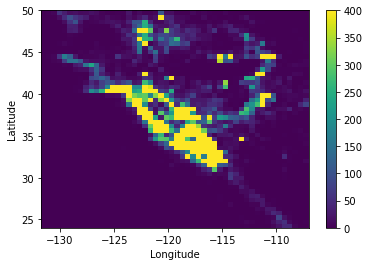

In [113]:
df_eq_plot = df_eq[df_eq["depth"]<50]

plt.hist2d(df_eq_plot['longitude'], df_eq_plot['latitude'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(0, 0.5, 'Depth (km)')

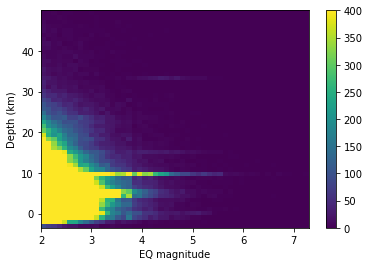

In [114]:
df_eq_plot = df_eq[df_eq["depth"]<50]

plt.hist2d(df_eq_plot['mag'], df_eq_plot['depth'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('EQ magnitude')
plt.ylabel('Depth (km)')

### Figure discussion: 
---
The plots corroborate the mentioned points.

## Resampling the data by one-minute

In [115]:
df_eq

,mag,sig,longitude,latitude,depth,timestamps
time,,,,,,
1970-01-02 10:45:20.570,3.14,152,-119.695667,34.206000,6.000000,1970-01-02 10:45:20.570
1970-01-02 21:47:53.740,2.61,105,-117.733667,35.735167,1.650000,1970-01-02 21:47:53.740
1970-01-03 02:51:58.400,4.00,246,-122.088000,37.298000,6.274206,1970-01-03 02:51:58.400
1970-01-03 19:48:40.840,3.16,154,-116.830500,33.960500,6.000000,1970-01-03 19:48:40.840
1970-01-04 02:27:15.700,2.74,116,-116.843333,34.333500,6.000000,1970-01-04 02:27:15.700
...,...,...,...,...,...,...
2020-10-01 15:00:48.340,3.05,143,-115.572998,33.069332,13.970000,2020-10-01 15:00:48.340
2020-10-01 15:10:23.760,2.05,65,-115.571000,33.080167,1.110000,2020-10-01 15:10:23.760
2020-10-01 15:12:42.120,2.12,69,-115.578167,33.068000,2.650000,2020-10-01 15:12:42.120


In [121]:
df_eq_resampled = df_eq.resample('1T').mean()

df_eq_resampled.head()


,mag,sig,longitude,latitude,depth
time,,,,,
1970-01-02 10:45:00,3.14,152.0,-119.695667,34.206,6.0
1970-01-02 10:46:00,NaN,NaN,NaN,NaN,NaN
1970-01-02 10:47:00,NaN,NaN,NaN,NaN,NaN
1970-01-02 10:48:00,NaN,NaN,NaN,NaN,NaN
1970-01-02 10:49:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Copyright: 2019 The TensorFlow Authors.

fft = tf.signal.rfft(df_eq['mag'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_eq['mag'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

### Is there any lag-dependency trends?

Text(0.5, 1.0, 'Mag')

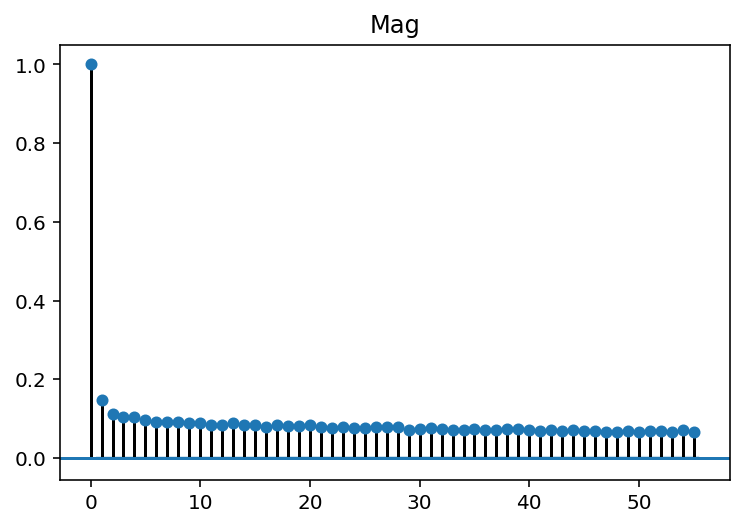

In [5]:
%config InlineBackend.figure_format = 'retina'
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_eq['mag'])
plt.title('Mag - ACF')

# plt.show()

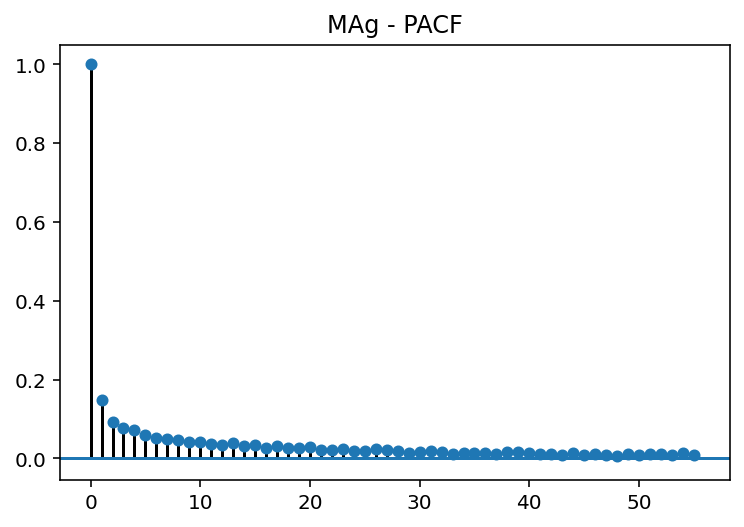

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_eq['mag'])
plt.title('MAg - PACF')

plt.show()

### Checking for stationarity